# Lecture 7. 인공 신경망 (순전파)

> Eunmi Kim    
 계산과학 프로그래밍 및 실습


---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 활성화 함수



### Step function

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
step_function(2)

1

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
step_function(x)

ValueError: ignored

In [ ]:
def step_function(x):
    return np.array(x > 0, dtype=int) #dtype=int안하면 True, False로만 반환됨

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
step_function(x)

array([0, 1, 1])

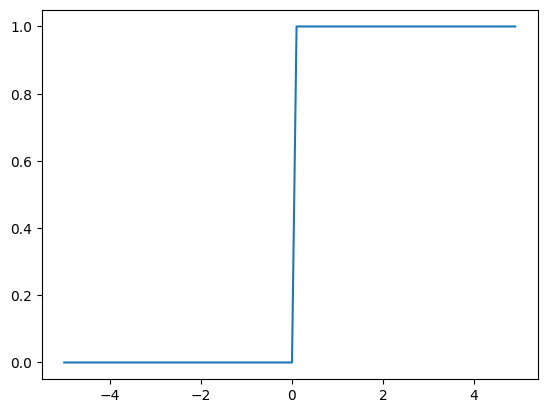

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) #[-4.9 -4.8 -4.7 ... 4.9 5.0]
y = step_function(x)
plt.plot(x, y)
plt.show()

### Sigmoid

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

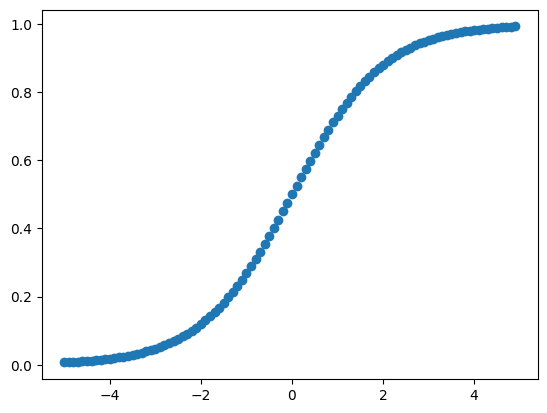

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.scatter(x, y)
plt.show()

### ReLU

[2 5 0]


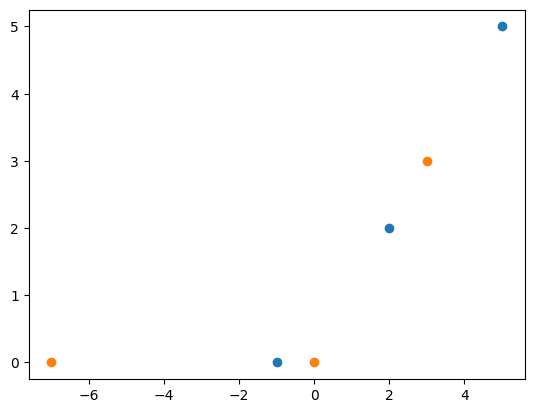

In [ ]:
def relu(x):
    return np.maximum(0, x) # 배열 반환

a=np.array([2,5,-1])
b=np.array([3,-7,0])

plt.scatter(a,relu(a))
plt.scatter(b,relu(b))


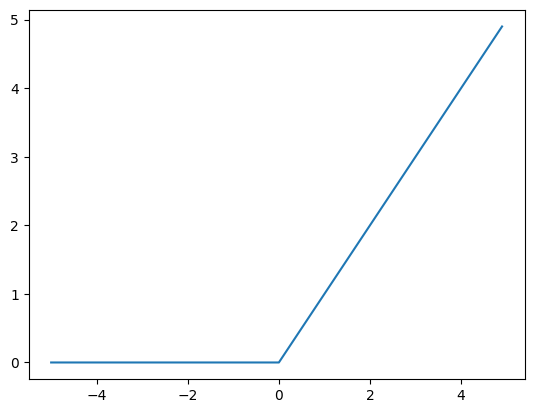

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.show()

### Softmax

In [ ]:
a=np.array([10,1,99])
np.exp(a)/np.sum(np.exp(a)) #entry-wise
#np.sum(배열)은 배열안의 요소들 다 더한 값

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

#But overflow 발생 가능. e함수자체가 개빨라서ㅇㅇ

<ipython-input-12-b112c158b9ba>:6: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-12-b112c158b9ba>:6: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

**개선법**

$$
\begin{align}
y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)} &= \frac{C \exp(a_k)}{C \sum_{i=1}^n \exp(a_i)}\\
&= \frac{\exp(a_k + \log C)}{\sum_{i=1}^n \exp(a_i + \log C)}\\
&= \frac{\exp(a_k + C')}{\sum_{i=1}^n \exp(a_i + C')}
\end{align}
$$


In [ ]:
def softmax(a):
    c = np.max(a) #이런식으로 설정
    exp_a = np.exp(a - c)  # overflow 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
softmax(a)

array([0.04731416, 0.95033021, 0.00235563])

In [ ]:
x = np.array([0.3, 2.9, 4.0])
y = softmax(x)
print(y)

np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

## 2. 순전파

In [ ]:
x = np.random.randn(2) #랜덤한 두수로 이루어진 배열

# layer 1 weight and bias
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)

# layer 2 weight and bias
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

# forward propagation
h = sigmoid(np.dot(x, W1) + b1)
y = softmax(np.dot(h, W2) + b2)

In [ ]:
print("x=", x)
print("h=", h)
print("y=", y)

x= [-0.32971014 -1.0189819 ]
h= [0.86256493 0.58099565 0.46692423 0.09527041]
y= [0.10664802 0.40415518 0.4891968 ]


### mini-batch

In [ ]:
x = np.random.randn(10, 2) #10개의 데이터를 같이 계산

# layer 1 weight and bias
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)

# layer 2 weight and bias
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

# forward propagation

h = sigmoid(np.dot(x, W1) + b1)
y = softmax(np.dot(h, W2) + b2)

In [ ]:
print("x=", x)
print("h=", h)
print("y=", y)
#합이 1이 아님......

x= [[-0.27444663  0.50091483]
 [-0.86209488 -0.90933466]
 [-0.95009244 -0.97889747]
 [ 0.98688871  0.23458528]
 [ 0.39574749  0.95932196]
 [ 1.68513805 -0.35049507]
 [-1.34507151 -1.01866645]
 [ 0.63479557 -0.75063639]
 [-0.82015095  1.08486827]
 [ 0.29582985 -0.32442186]]
h= [[0.51216375 0.55504177 0.43036031 0.11333746]
 [0.03084296 0.07651858 0.50908551 0.11085645]
 [0.02552073 0.07036722 0.49073775 0.10666418]
 [0.47757213 0.21445133 0.86408872 0.25265542]
 [0.79694701 0.67935255 0.58407867 0.1534567 ]
 [0.23468564 0.0425024  0.9677742  0.395571  ]
 [0.02013619 0.08472708 0.35457763 0.08351913]
 [0.07515779 0.03784709 0.89651748 0.25725375]
 [0.76787007 0.87247806 0.1677229  0.06858123]
 [0.16113302 0.1153801  0.78314846 0.19456201]]
y= [[0.00457926 0.01289185 0.07547377]
 [0.00800283 0.01861056 0.04541395]
 [0.0077563  0.01796369 0.04453346]
 [0.01572778 0.03138028 0.07855553]
 [0.00575518 0.01574022 0.10372076]
 [0.02380736 0.04042728 0.06920456]
 [0.00584209 0.01356617 0.0409441

In [ ]:
def softmax(x): #재정의! -> 왜냐하면 아까꺼는 하나의 데이터만을 처리하도록 구현됨
    if x.ndim == 2: #빼면 dim=1이 됨;;
        x = x.T
        x = x - np.max(x, axis=0)#
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [31]:
x = np.random.randn(10, 2)
print("x=",x)
print("np.max(x)=",np.max(x))
print("np.max(x,axis=0)=",np.max(x,axis=0))
print("np.max(x,axis=1)=",np.max(x,axis=1))
print("np.sum(np.exp(x))=",np.sum(np.exp(x)))

x= [[-1.19784144  1.96463497]
 [ 2.82043233  0.40088466]
 [-1.08252697  1.64685832]
 [-0.1634348  -1.61988667]
 [ 1.73237065 -1.38943038]
 [-0.54970417 -0.26966885]
 [-0.82581487  1.98051432]
 [-2.67106564  3.15751194]
 [ 0.46288335  1.28071566]
 [ 1.93946084  0.71108653]]
np.max(x)= 3.1575119417037243
np.max(x,axis=0)= [2.82043233 3.15751194]
np.max(x,axis=1)= [ 1.96463497  2.82043233  1.64685832 -0.1634348   1.73237065 -0.26966885
  1.98051432  3.15751194  1.28071566  1.93946084]
np.sum(np.exp(x))= 84.97655878546033


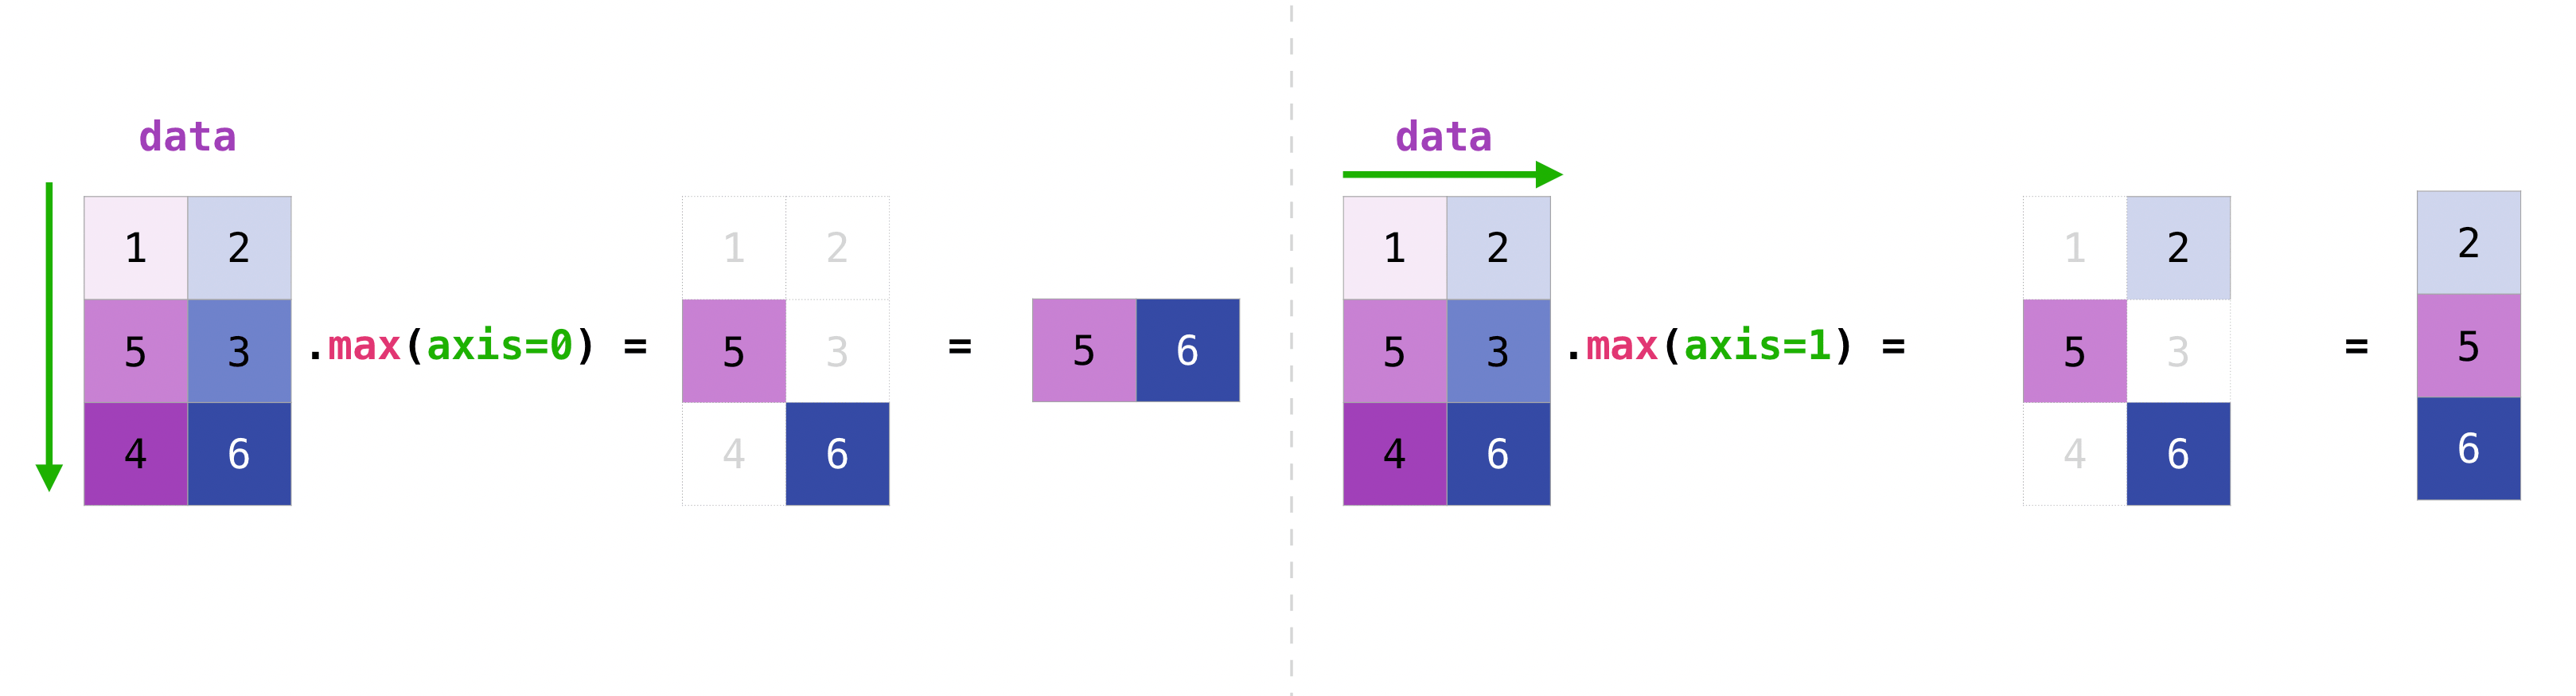

In [ ]:
x = np.random.randn(10, 2) #10개의 데이터를 같이 계산

# layer 1 weight and bias
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)

# layer 2 weight and bias
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

# forward propagation

h = sigmoid(np.dot(x, W1) + b1)
y = softmax(np.dot(h, W2) + b2)

print("x=", x)
print("h=", h)
print("y=", y)
#합이 1이 아님......

x= [[-2.67683699e+00  1.53953524e+00]
 [ 5.43714484e-03 -6.88930289e-01]
 [ 1.66223090e+00  4.53920647e-01]
 [ 3.89697495e-01  5.28371051e-01]
 [ 7.78687049e-01 -4.93285917e-01]
 [-2.24244019e+00  4.67962525e-01]
 [ 1.11049563e-01 -5.96247291e-04]
 [-1.28574681e+00 -8.71177462e-01]
 [-2.79595835e-01  1.96349221e-01]
 [ 9.10784753e-01  1.54812373e+00]]
h= [[0.38497672 0.01310636 0.7698715  0.13204783]
 [0.62500665 0.91152341 0.88885506 0.40413906]
 [0.76112756 0.95930479 0.04545405 0.40704297]
 [0.66316707 0.78308808 0.22282332 0.32522307]
 [0.69157971 0.95925032 0.60989317 0.43524843]
 [0.42018061 0.08964382 0.95006882 0.20039018]
 [0.63707513 0.82966825 0.59127943 0.35203756]
 [0.50448896 0.68230549 0.98879371 0.34212031]
 [0.60297564 0.68578016 0.62927665 0.31396836]
 [0.70941573 0.66459082 0.01280886 0.27589625]]
y= [[0.79828309 0.16605041 0.0356665 ]
 [0.72494968 0.19925989 0.07579042]
 [0.20076557 0.69448482 0.10474962]
 [0.33200327 0.56927595 0.09872078]
 [0.53753628 0.36149576 0